# ggplot 233 - How to make an area plot

This notebook shows how to make area plots with geom_ribbon.  (see 4)

geom_area() is not implemented fully in plotnine.  
However it is possible to do area plots with geom_ribbon.  
(geom_ribbon can do the same as geom_area, plus it can do more ).  

#### WARNING - it looks like that plotnine geom_ribbon only works well when the data is sorted on the x-variable (see 5)

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
from math import *
data = [[x, round(sin(0.125*3.14159*x),3)] for x in range(10)]
df= pd.DataFrame(data,columns=['x', 'sinx'])
df.head(10)

,x,sinx
0,0,0.000
1,1,0.383
2,2,0.707
3,3,0.924
4,4,1.000
5,5,0.924
6,6,0.707
7,7,0.383
8,8,0.000
9,9,-0.383


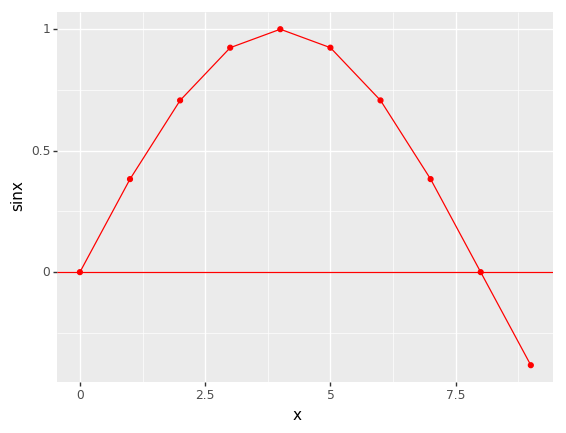

<ggplot: (-9223372036840375955)>

In [3]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_hline(yintercept=0, color='red')

# 2- use geom_ribbon to draw a band around the sin curve

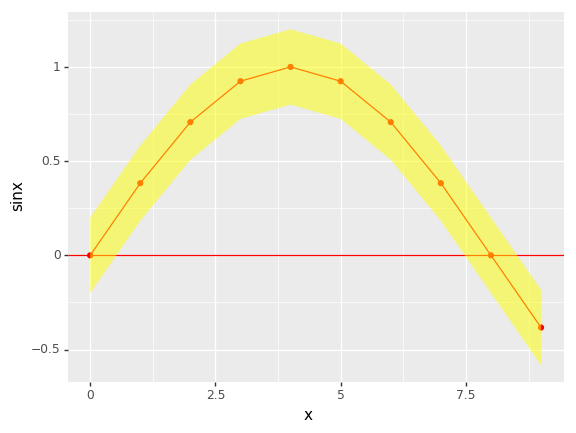

<ggplot: (-9223372036840312106)>

In [4]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_hline(yintercept=0, color='red') + \
    geom_ribbon(aes(ymin='sinx - 0.2', ymax='sinx + 0.2'), fill='yellow', alpha=0.5 )

To draw a ribbon specify ymin= and ymax= .
Here we specified 
- ymin='sinx - 0.2 '  (i.e. the lowpoint of the ribbon  is 0.2 below the y-value)
- ymin='sinx + 0.2 '  (i.e. the highpoint of the ribbon is 0.2 above the y-value)  

Effectively a 0.4 units wide band (or ribbon) is drawn that follows the red curve.

The band does not have to be symmetrical, e.g also possible is: 
- ymin='0.75*sinx'  
- ymin='1.25*sinx'  

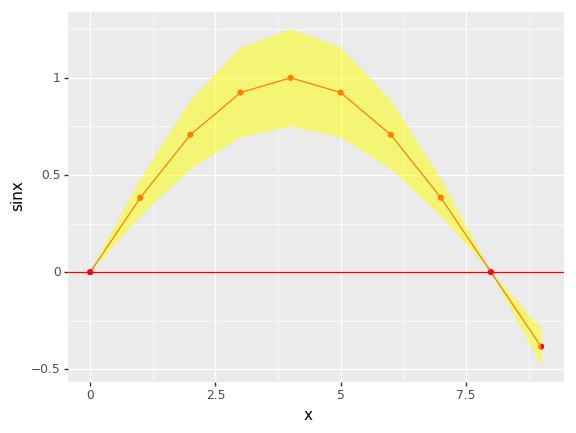

<ggplot: (-9223372036840253559)>

In [5]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_hline(yintercept=0, color='red') + \
    geom_ribbon(aes(ymin='0.75*sinx', ymax='1.25*sinx'), fill='yellow', alpha=0.5 )

## Aesthetics
- ymin ----- (position of under-side of the ribbon)
- ymax ----- (position of upper-side of the ribbon)
- alpha ---- (transparency)
- fill ----- (color of the ribbon)

# 3 - an other example of what geom_ribbon can do

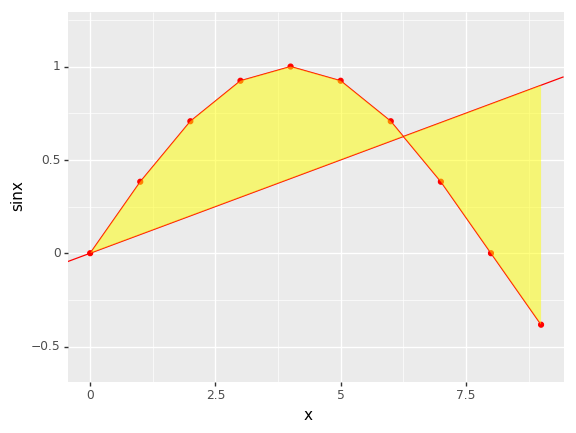

<ggplot: (-9223372036840291910)>

In [6]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_abline(intercept=0, slope=0.1, color='red') + \
    geom_ribbon(aes(ymin='0.1*x', ymax='sinx'), fill='yellow', alpha=0.5 ) + \
    ylim(-0.6,1.2)

# 4 - use geom_ribbon to make an area plot

An area plot is a specialized ribbon plot with
- ymin='y' (in our case 'sinx')  
- ymin=0  

So this gives the area between the curve and the y=0 axis.

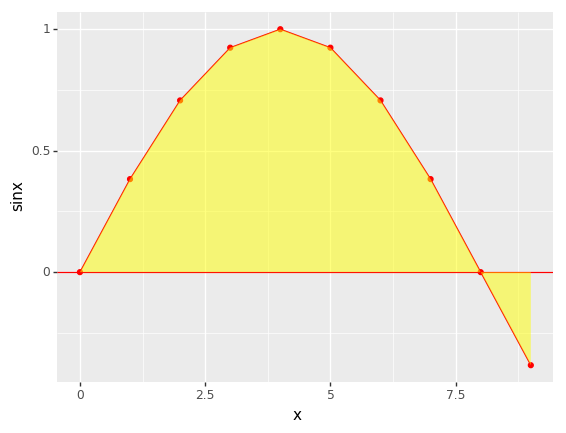

<ggplot: (14653581)>

In [7]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_hline(yintercept=0, color='red') + \
    geom_ribbon(aes(ymin=0, ymax='sinx'), fill='yellow', alpha=0.5 )

#### here is what the plotnine geom_area() really produces
(not really what we want)

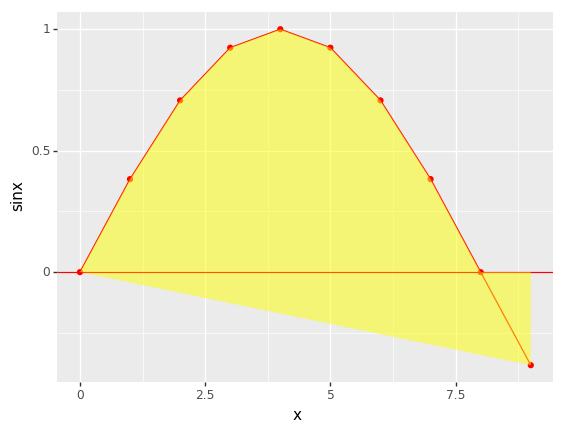

<ggplot: (14663607)>

In [8]:
ggplot(data=df, mapping=aes(x='x', y='sinx')) + \
    geom_point(color='red') + \
    geom_line(color='red') + \
    geom_hline(yintercept=0, color='red') + \
    geom_area(fill='yellow', alpha=0.5 )

# 5 - strange behavior of geom_ribbon

plotnine geom_ribbon is not perfect yet.  
Here is what happens with our 500 diamonds data points.

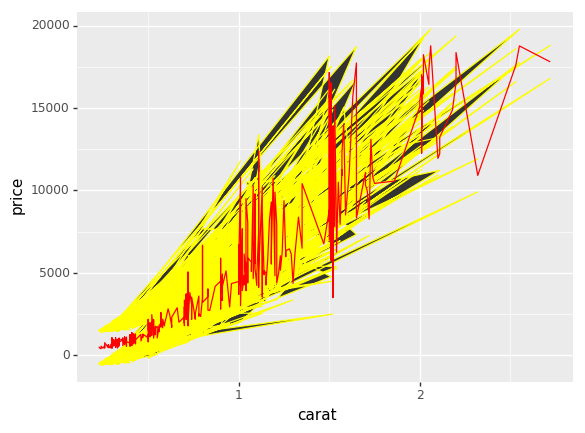

<ggplot: (-9223372036840117886)>

In [9]:
dia = pd.read_csv('./dat/dia.csv')

ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_ribbon(mapping=aes(ymin='price-1000', ymax='price+1000'), color='yellow') + \
    geom_line(color='red')

In [10]:
# lets see how the data in dia are sorted
dia.head(20)
# NOTE that they are not sorted on carat.

,carat,cut,color,price
0,0.71,Ideal,G,2950
1,1.55,Premium,G,10499
2,0.51,Good,E,1170
3,1.01,Ideal,D,10797
4,0.47,Ideal,F,1226
5,0.30,Premium,F,737
6,0.80,Good,F,3477
7,0.31,Very Good,G,625
8,0.80,Ideal,H,3972
9,0.54,Ideal,H,1774


In [11]:
# make a copy of dia that is sorted on carat
dia2= dia.sort_index(by='carat')
dia2.head(20)

,carat,cut,color,price
462,0.23,Very Good,D,458
89,0.23,Ideal,F,530
267,0.23,Ideal,F,530
246,0.23,Ideal,F,530
192,0.24,Very Good,E,552
280,0.24,Very Good,F,417
464,0.24,Ideal,G,559
278,0.24,Very Good,E,461
10,0.24,Very Good,F,404
94,0.25,Very Good,D,436


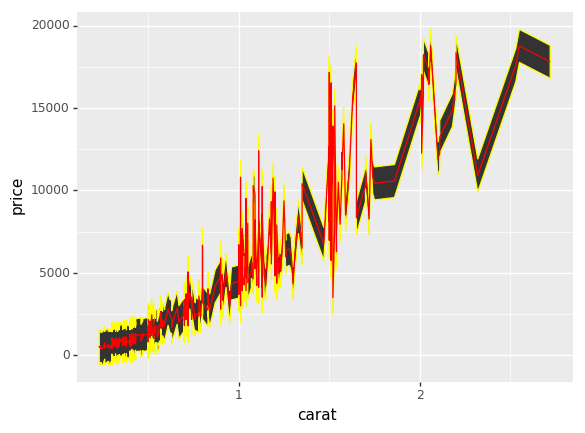

<ggplot: (14746025)>

In [12]:
# now lets make the ribbon plot again
ggplot(data=dia2, mapping=aes(x='carat', y='price')) + \
    geom_ribbon(mapping=aes(ymin='price-1000', ymax='price+1000'), color='yellow') + \
    geom_line(color='red')
# that is more what we would expect, only what is this black band doing there?